In [2]:
import torch
import matplotlib.pyplot as plt
from stimulus import *

In [3]:
#study parameters of interest

def transition(hf, hs, pars):
    # size (B, V)
    a,b,c,d,e = pars['a'],pars['b'],pars['c'],pars['d'],pars['e']
    hfn = hf * (1-c) + c*torch.tanh((a + b*hf**2 - hs)*hf) #0 input response
    hsn = hs*(1-d) + d*(e*hf)**4

    return hfn, hsn 

hfs = torch.meshgrid(torch.linspace(-1.5,1.5, 100), torch.linspace(-.5,6,100), indexing = 'ij')
hfs = torch.cat((hfs[0].unsqueeze(0), hfs[1].unsqueeze(0)))

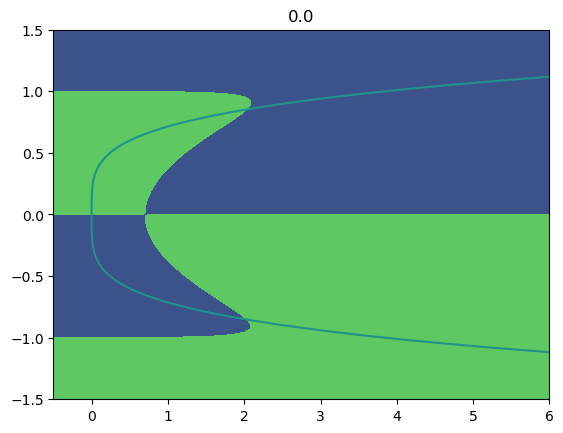

In [9]:
pars = {'a': 1.7,
        'b': 2.5,
        'c': .4,
        'd': .03,
        'e': 1.4
        }

for a in torch.linspace(0,3,1):
    # pars['e'] = a
    hfn, hsn = transition(hfs[0], hfs[1], pars)
    plt.contourf(hfs[1], hfs[0], hfn - hfs[0], 0)
    plt.contour(hfs[1], hfs[0], hsn - hfs[1], 0)
    plt.title(f'{a}')
    plt.show()